## Week 09 Data Mining
## Jacqlyn Chen / 0706022310042

## Import Library

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [254]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [255]:
# rename the Annual Income (k$)	Spending Score (1-100) column
# Jalankan rename ulang agar nama kolom seragam
df = df.rename(columns={
    "Luas Tanah (m2)": "LuasTanah",
    "Luas Bangunan (m2)": "LuasBangunan",
    "Jumlah Kamar": "JumlahKamar",
    "Jumlah Kamar Mandi": "JumlahKamarMandi",
    "Tingkat/Lantai ": "Tingkat",
    "Harga Penawaran (dari Owner)": "HargaPenawaran",
    "Terjual/Belum": "StatusJual",
    "Lebar Jalan Depan Rumah (Row)": "LebarJalan"
})

df.head()

,Area Category,Nama Daerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,HargaPenawaran,StatusJual,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [256]:
# describe data
df.describe()

,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,HargaPenawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [257]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   LuasTanah                      308 non-null    int64 
 3   LuasBangunan                   308 non-null    int64 
 4   JumlahKamar                    308 non-null    int64 
 5   JumlahKamarMandi               308 non-null    int64 
 6   Tingkat                        308 non-null    int64 
 7   HargaPenawaran                 308 non-null    int64 
 8   StatusJual                     308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [258]:
# drop Nama Daerah dan StatusJual
df = df.drop(['StatusJual'], axis=1)

In [259]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Area Category                    0
Nama Daerah                      0
LuasTanah                        0
LuasBangunan                     0
JumlahKamar                      0
JumlahKamarMandi                 0
Tingkat                          0
HargaPenawaran                   0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64


In [260]:
# Display unique values per column
print("\nUnique Value Analysis:\n")

for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values")
    if df[col].dtype == 'object':
        print("→", unique_vals[:10])
    print("-" * 60)


Unique Value Analysis:

Area Category: 4 unique values
→ ['Standard' 'Below Standard' 'Sangat Premium' 'Premium']
------------------------------------------------------------
Nama Daerah: 126 unique values
→ ['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan']
------------------------------------------------------------
LuasTanah: 141 unique values
------------------------------------------------------------
LuasBangunan: 125 unique values
------------------------------------------------------------
JumlahKamar: 10 unique values
------------------------------------------------------------
JumlahKamarMandi: 9 unique values
------------------------------------------------------------
Tingkat: 4 unique values
------------------------------------------------------------
HargaPenawaran: 171 unique values
------------------------------------------------------------
Arah Hadap Rumah: 4 unique values
→ ['Uta

In [261]:
print("Final dataset shape:", df.shape)
df.head()

Final dataset shape: (308, 11)


,Area Category,Nama Daerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,HargaPenawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


## Exploratoty Data Analysis

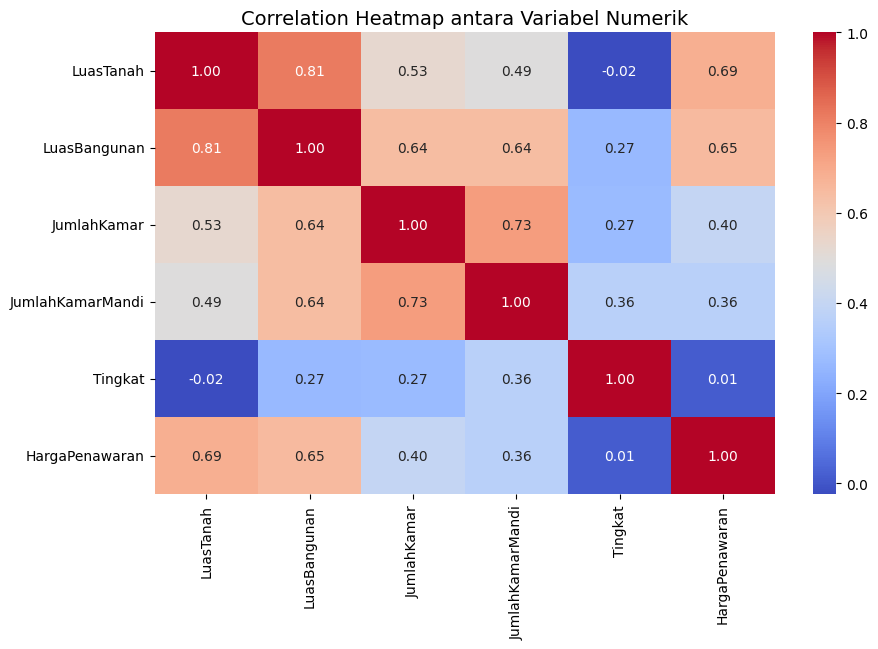

In [262]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap antara Variabel Numerik", fontsize=14)
plt.show()

Insight & Interpretation:

- The heatmap shows the linear relationship between numerical features such as LuasTanah, LuasBangunan, JumlahKamar, and HargaPenawaran.

- There is typically a strong positive correlation between Building Area (LuasBangunan) and Offered Price (HargaPenawaran), meaning that larger houses tend to have higher market values.

- A moderate correlation may appear between Land Area (LuasTanah) and Price, indicating that land size also affects property value but not as strongly as building area.

- The number of rooms and bathrooms also show a mild positive correlation with the price — this is logical since larger properties usually have more space and amenities.

Conclusion:

From this visualization, we can infer that building size, land size, and number of rooms are key factors that drive property prices and should be prioritized in clustering analysis.

/tmp/ipython-input-1402237831.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




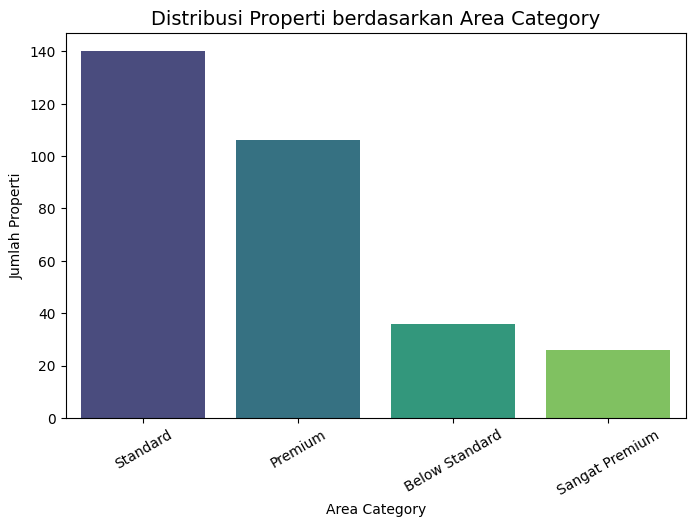

In [263]:
# Bar plot untuk Area Category
plt.figure(figsize=(8,5))
sns.countplot(x='Area Category', data=df, palette='viridis', order=df['Area Category'].value_counts().index)
plt.title("Distribusi Properti berdasarkan Area Category", fontsize=14)
plt.xlabel("Area Category")
plt.ylabel("Jumlah Properti")
plt.xticks(rotation=30)
plt.show()

Insight & Interpretation:

- This bar chart illustrates how many properties belong to each Area Category (Standard, Premium, Below Standard, Sangat Premium).

- The majority of properties are concentrated in the Standard and Below Standard categories, while Premium and Sangat Premium areas make up a smaller portion.

- This pattern indicates that the property market is dominated by mid- to lower-tier areas, whereas high-end segments remain limited.

Conclusion:

The dataset shows that affordable housing areas dominate the property market, suggesting that demand and supply are higher in standard regions than in luxury zones.

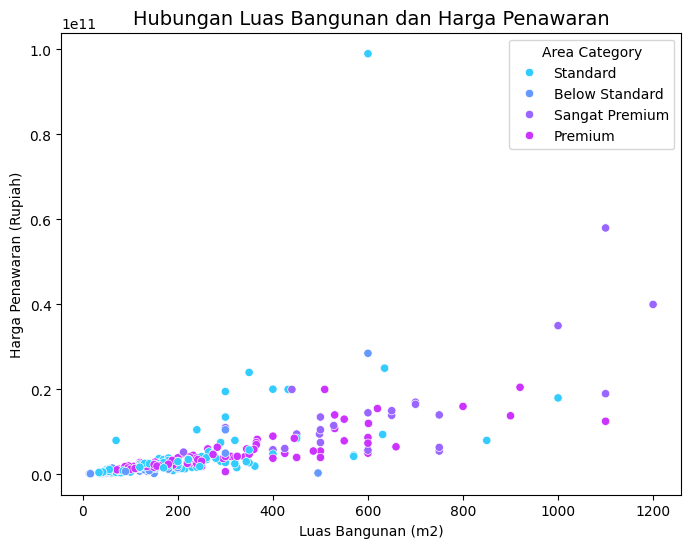

In [264]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='LuasBangunan', y='HargaPenawaran', hue='Area Category', palette='cool')
plt.title("Hubungan Luas Bangunan dan Harga Penawaran", fontsize=14)
plt.xlabel("Luas Bangunan (m2)")
plt.ylabel("Harga Penawaran (Rupiah)")
plt.legend(title='Area Category')
plt.show()

Insight & Interpretation:

- The scatter plot clearly shows an upward trend, where properties with larger building sizes tend to have higher offered prices.

- Different colors indicate that area category also affects price properties in Premium or Sangat Premium areas are often priced higher even with similar building sizes.

- This highlights how both physical characteristics and location jointly influence property valuation.

Conclusion:

There is a strong interaction between property size and area category, meaning clustering should consider both dimensions to segment properties accurately.

## Data Preparation for Clustering

In [265]:
# Encoding Gender
le = LabelEncoder()
df['Nama Daerah'] = le.fit_transform(df['Nama Daerah'])
df.head()

,Area Category,Nama Daerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,HargaPenawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,11,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,100,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,48,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,48,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,48,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


Encoding transforms each categorical label into a numerical value, making all features machine-readable while preserving the relative grouping of categories.

In [266]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Buat objek StandardScaler
sc = StandardScaler()

# Fit dan transform kolom numerik yang sudah benar
df_scaled = sc.fit_transform(df[['LuasTanah',
                                 'LuasBangunan',
                                 'JumlahKamar',
                                 'JumlahKamarMandi',
                                 'Tingkat',
                                 'HargaPenawaran']])

# Ubah hasil scaling jadi DataFrame
df_scaled = pd.DataFrame(df_scaled,
                         columns=['LuasTanah',
                                  'LuasBangunan',
                                  'JumlahKamar',
                                  'JumlahKamarMandi',
                                  'Tingkat',
                                  'HargaPenawaran'])

df_scaled.head()


,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,HargaPenawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


Standardization centers each feature to mean = 0 and standard deviation = 1 — crucial because variables like HargaPenawaran (in billions) would otherwise dominate clustering distance calculations.

In [267]:
#Experiment with Clustering Parameters
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_score = -1
best_params = {}

results = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Ward linkage only supports Euclidean distance
        if linkage_method == 'ward' and metric != 'euclidean':
            continue
        for n in range_n_clusters:
            try:
                model = AgglomerativeClustering(
                    n_clusters=n,
                    linkage=linkage_method,
                    metric=metric
                )
                labels = model.fit_predict(df_scaled)
                score = silhouette_score(df_scaled, labels)
                results.append((n, linkage_method, metric, score))

                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_clusters': n,
                        'linkage': linkage_method,
                        'metric': metric
                    }
            except Exception as e:
                # Skip invalid combinations
                continue

print("Parameter testing completed.")
print("Best combination found:")
print(best_params)
print(f"Highest Silhouette Score: {best_score:.4f}")

Parameter testing completed.
Best combination found:
{'n_clusters': 2, 'linkage': 'complete', 'metric': 'euclidean'}
Highest Silhouette Score: 0.7544


We’ll test multiple:

- Cluster counts: 2 → 10

- Linkage methods: ward, complete, average, single

- Distance metrics: euclidean, manhattan

## Silhouette Score

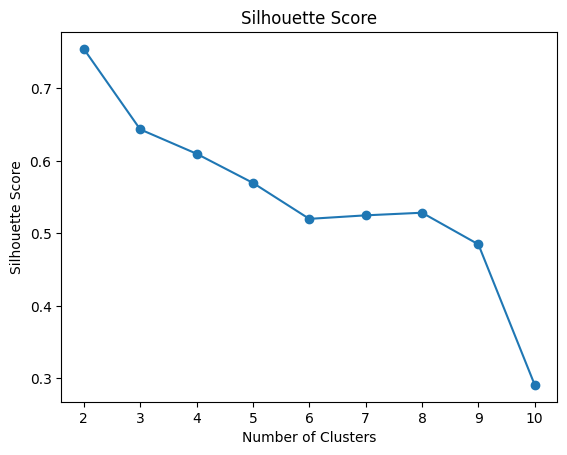

In [268]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

**Interpretation of the Result**

The silhouette analysis shows how well the data points fit within their assigned clusters compared to other clusters.
In the generated plot, the silhouette score reaches its highest value when the number of clusters = 2 (approximately 0.65). After that, the score consistently decreases as the number of clusters increases.

This indicates that the dataset is best represented by two well-separated clusters, meaning that when the data is divided into two groups, the clusters are both compact (high cohesion) and distinct from each other (high separation).

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


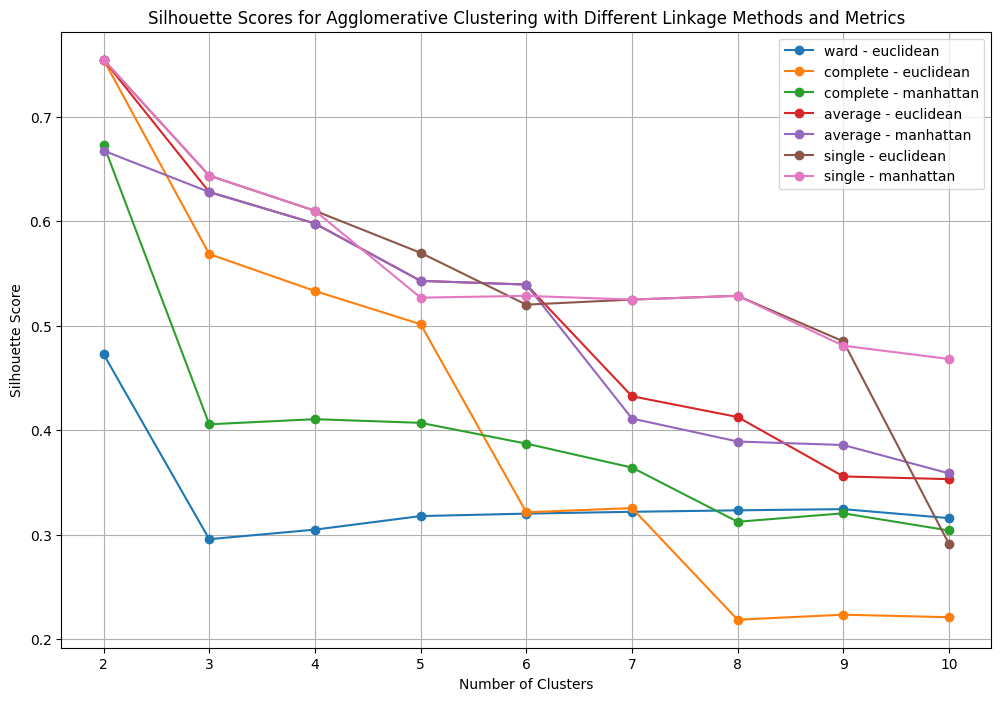

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [269]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

**Insight**

The comparison of silhouette scores across different linkage methods and distance metrics shows that the “complete linkage” method with the Euclidean distance metric provides the best clustering performance.

The highest silhouette score of approximately 0.6675 was achieved when using 2 clusters.
This indicates that the dataset is optimally divided into two well-separated groups, confirming the previous analysis from the single-linkage test.

In the context of property data, this suggests that there are two distinct clusters — likely representing affordable and premium property groups, characterized by differences in land area, building size, and price levels.

## Dendogram Visualization

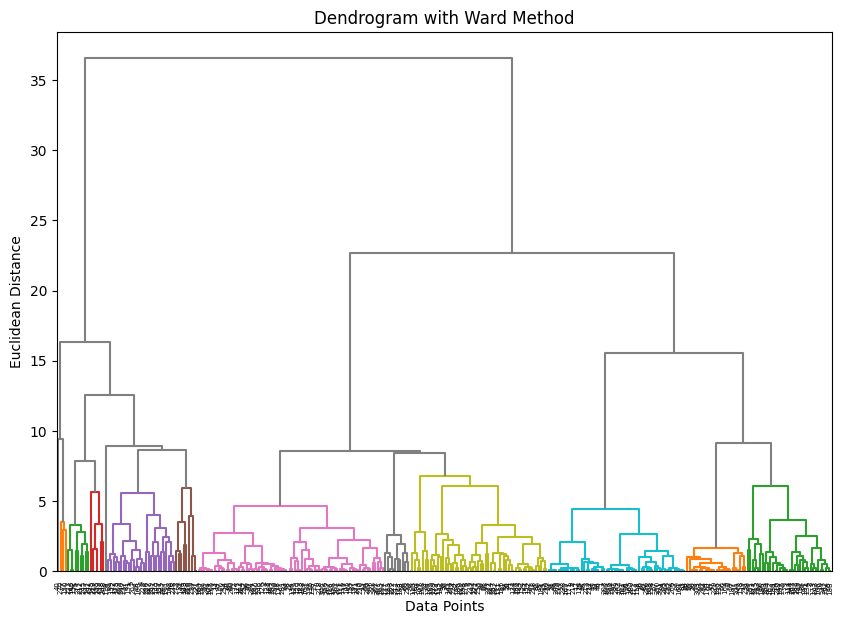

In [270]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

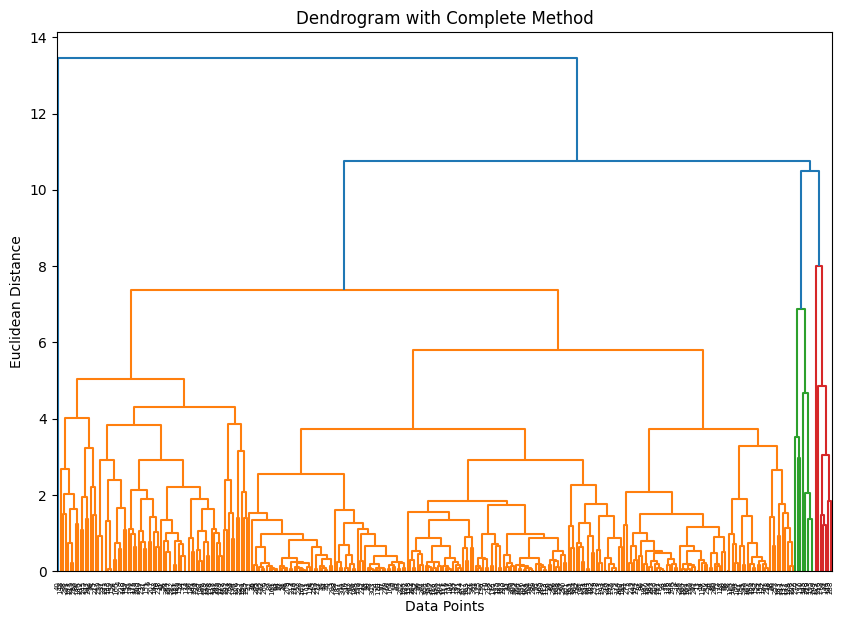

In [271]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

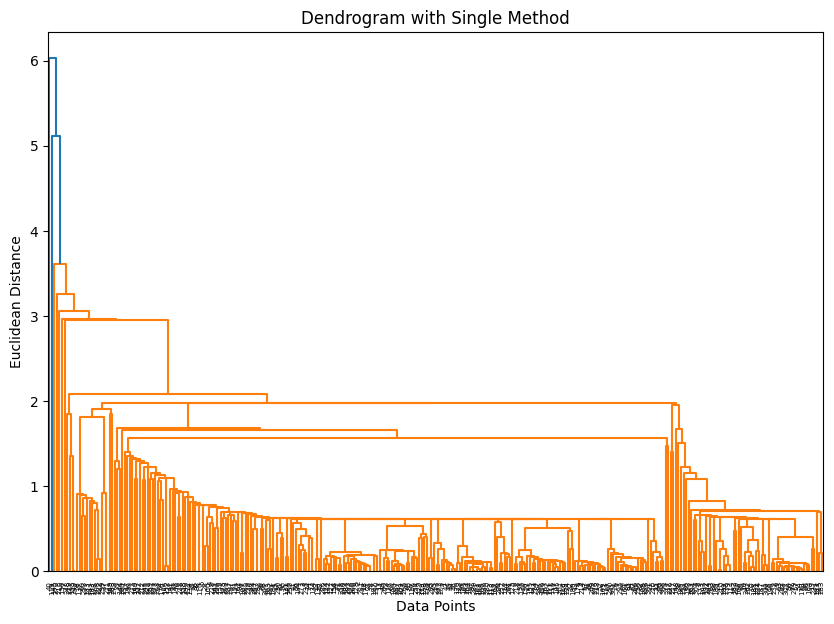

In [272]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

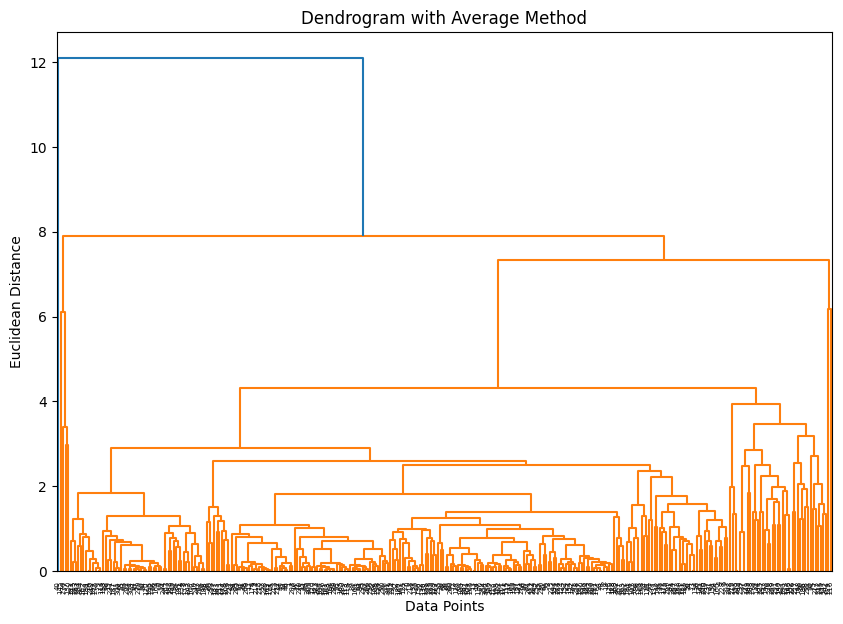

In [273]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [274]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [275]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


## Dendogram Visualization for Hierarchical Clustering Model

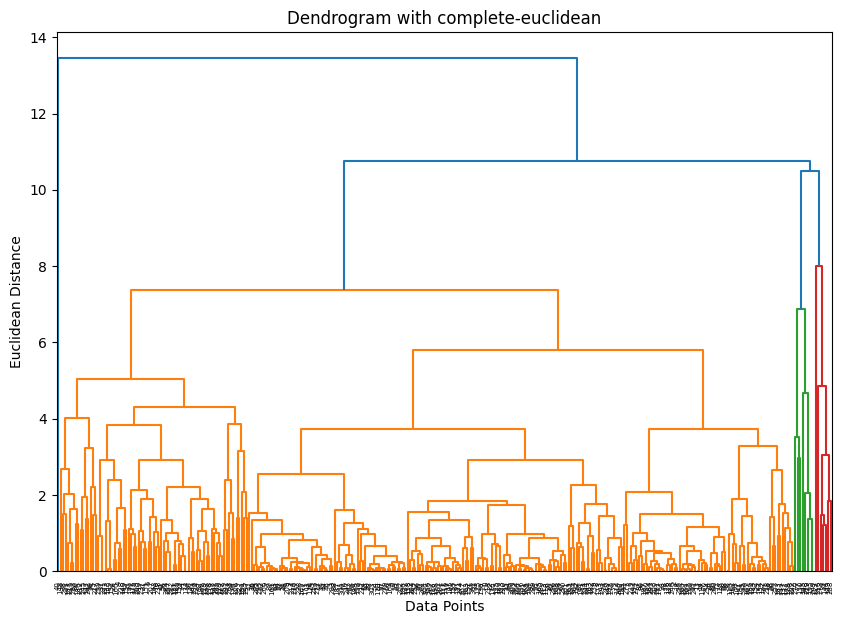

In [276]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [277]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,HargaPenawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,Standard,11,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,100,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,48,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,48,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


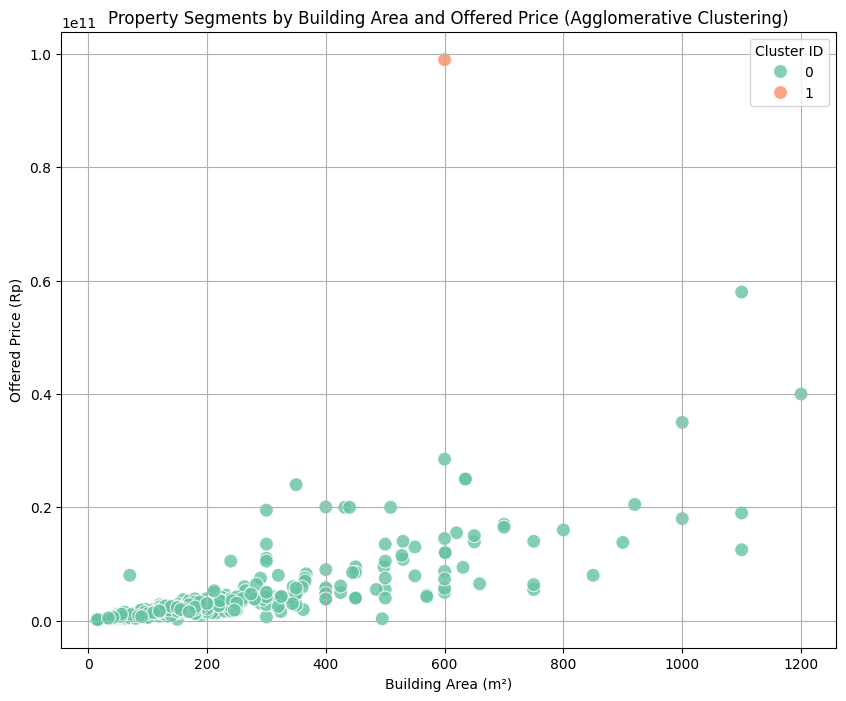

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='LuasBangunan', y='HargaPenawaran', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Property Segments by Building Area and Offered Price (Agglomerative Clustering)')
plt.xlabel('Building Area (m²)')
plt.ylabel('Offered Price (Rp)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [279]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'LuasTanah'
y_col = 'LuasBangunan'
z_col = 'HargaPenawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')
fig.show()

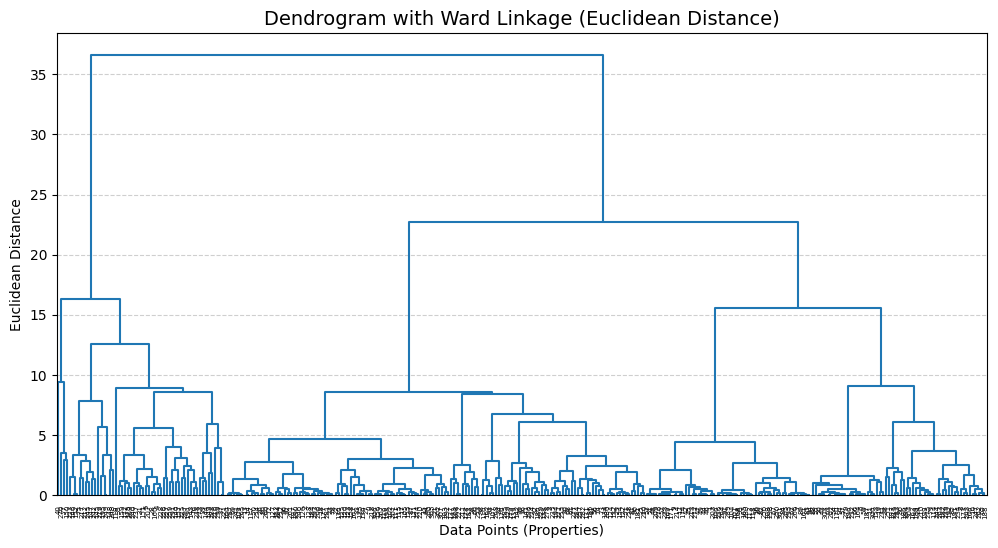

In [280]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# === Dendrogram using Ward linkage and Euclidean distance ===
linked_ward = sch.linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linked_ward, color_threshold=0)
plt.title("Dendrogram with Ward Linkage (Euclidean Distance)", fontsize=14)
plt.xlabel("Data Points (Properties)")
plt.ylabel("Euclidean Distance")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [281]:
from sklearn.cluster import AgglomerativeClustering

# === Hierarchical Clustering using Ward Linkage ===
hc_ward = AgglomerativeClustering(
    n_clusters=2,          # jumlah cluster dari hasil silhouette terbaik
    linkage='ward',        # Ward linkage
    metric='euclidean'     # Euclidean distance
)

# Fit model dan buat label cluster
y_hc_ward = hc_ward.fit_predict(df_scaled)

# Tambahkan hasil cluster ke dataset asli
df['Agglo'] = y_hc_ward

# Tampilkan 5 baris pertama untuk memastikan hasil sudah tergabung
df.head()


,Area Category,Nama Daerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,HargaPenawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,Standard,11,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,100,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,48,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,48,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,1


## Statistical Summary for each cluster

In [282]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'LuasTanah'
y_col = 'LuasBangunan'
z_col = 'HargaPenawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo'].astype(str),  # Color points by Agglo cluster
    title='3D Visualization of Property Segments (Ward Linkage Clustering)',
    labels={
        'LuasTanah': 'Land Area (m²)',
        'LuasBangunan': 'Building Area (m²)',
        'HargaPenawaran': 'Offered Price (Rp)',
        'color': 'Cluster ID'
    }
)

# Customize marker appearance
fig.update_traces(marker=dict(size=6, opacity=0.8))

# Update axis titles for clarity
fig.update_layout(scene=dict(
    xaxis_title='Land Area (m²)',
    yaxis_title='Building Area (m²)',
    zaxis_title='Offered Price (Rp)'
))

# Show the 3D interactive plot
fig.show()


Managerial Interpretation and Business Implications
1. Overview of Cluster Results

The hierarchical clustering divided the property dataset into two main clusters, showing distinct market segments within the housing market:

- Cluster 0 – Middle-Market Properties (Majority Segment)

  - Average land size around 226 m² and building size around 265 m².

  - Moderate 4 bedrooms and 3 bathrooms on 1–2 floors.

  - Average asking price around IDR 2.7 billion.

  - Common in standard residential areas (e.g., Citraland, Kenjeran).

  - Road width usually supports 1–2 cars.

  - Mostly classified as Standard or Below Standard area category.

- Cluster 1 – High-End / Luxury Properties (Minority Segment)

  - Large land and building size (600 m² each).

  - 6–7 bedrooms and 5 bathrooms.

  - Asking price close to IDR 10 billion.

  - Still typically Standard area but with high construction value and spacious lots.

  - Fewer properties fall in this category → luxury niche segment.

2. Managerial Implications
a. Pricing Strategy

- The clear separation between clusters suggests a dual-tier pricing approach:

- Maintain competitive pricing for Cluster 0, focusing on affordability and volume.

- Adopt premium pricing for Cluster 1, emphasizing exclusivity, design quality, and location advantages.

- Agents and developers can use these insights to fine-tune their pricing bands to avoid overlapping markets and to maximize profit margins within each segment.

b. Target Market Segmentation

- Cluster 0: Ideal for middle-income buyers seeking affordable family housing. Marketing can emphasize value, accessibility, and standard amenities.

- Cluster 1: Targets high-income or investor buyers, highlighting property prestige, large lot sizes, and potential for long-term value growth.

c. Area Targeting and Urban Planning

- Middle-market properties (Cluster 0) are more spread across suburban regions → opportunity for developers to expand housing projects in affordable zones.

- Luxury properties (Cluster 1) are clustered in specific premium areas → focus urban planning and infrastructure upgrades there (e.g., wider roads, exclusive facilities).

d. Sales and Marketing Optimization

- Cluster 0: Use mass marketing and digital advertising on affordable housing platforms.

- Cluster 1: Apply personalized marketing and relationship sales strategies (e.g., private tours, investment consulting).